## Feature Engineering and Remodeling  

#### To Do:

1. Perform the required Feature Engineering (Feature Selection using RFE, Feature Transformation, etc.)

2. Rebuild the models (Logistic Regression, SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc.

3. Compare the model (With Feature Engineering) Performance with previous model (Without Feature Engineering) 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
X = pd.read_csv("C:\\Users\\saism\\Documents\\Projects\\ML Project\\1426203-Task_-_3_(Apply_Classification_Algorithm)\\Task - 3 (Apply Classification Algorithm)\\X_final.csv")
y = pd.read_csv("C:\\Users\\saism\\Documents\\Projects\\ML Project\\1426203-Task_-_3_(Apply_Classification_Algorithm)\\Task - 3 (Apply Classification Algorithm)\\y_final.csv")


### RFE

In [3]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

In [4]:
estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)

In [5]:
selector = selector.fit(X, y)


In [6]:
selector.support_


array([False, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True, False, False,  True,  True,  True, False,
       False])

In [7]:
selector.ranking_


array([ 5,  4,  1,  1,  1,  1,  6,  7,  1,  3,  1,  1,  2,  8,  1,  1,  1,
        9, 10])

In [8]:
X.columns


Index(['Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age',
       'Lower_Age', 'Is_Spouse', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium', 'X1',
       'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'],
      dtype='object')

In [9]:
X = X[['Reco_Insurance_Type',
       'Lower_Age', 'Is_Spouse',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'X1',
       'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8' ]]

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 


def cal_vif(X):
    vif=pd.DataFrame()
    vif['var']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [11]:
cal_vif(X)


,var,VIF
0,Reco_Insurance_Type,35.23
5,X1,18.98
6,X2,8.49
7,X3,5.92
2,Is_Spouse,5.43
8,X4,5.30
4,Reco_Policy_Premium,4.04
1,Lower_Age,2.92
9,X5,2.43
10,X6,1.94


In [12]:
X.drop('Reco_Insurance_Type',axis=1,inplace=True)


In [13]:
cal_vif(X)


,var,VIF
3,Reco_Policy_Premium,2.55
0,Lower_Age,2.00
1,Is_Spouse,1.84
4,X1,1.12
5,X2,1.07
7,X4,1.04
6,X3,1.03
8,X5,1.03
2,Reco_Policy_Cat,1.01
9,X6,1.01


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression


In [15]:
#### Train Data


In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)

In [17]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_train,y_pred))
print('Precision =>',precision_score(y_train,y_pred))
print('F-1 score =>',f1_score(y_train,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_pred))
print('Recall score',recall_score(y_train,y_pred))

Accuracy => 0.5462509662458129
Precision => 0.542098714226462
F-1 score => 0.5974857142857143
Confusion matrix =>
 [[ 813 1104]
 [ 657 1307]]
Recall score 0.6654786150712831


In [18]:
#### Test Data

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5345005149330587
Precision => 0.508833922261484
F-1 score => 0.5603112840466926
Confusion matrix =>
 [[231 278]
 [174 288]]
Recall score 0.6233766233766234


In [21]:
y_pred_proba_logistic = lr.predict_proba(X_test)
y_pred_proba_logistic

array([[0.42449707, 0.57550293],
       [0.38807937, 0.61192063],
       [0.54420063, 0.45579937],
       ...,
       [0.48635262, 0.51364738],
       [0.49379677, 0.50620323],
       [0.61240407, 0.38759593]])

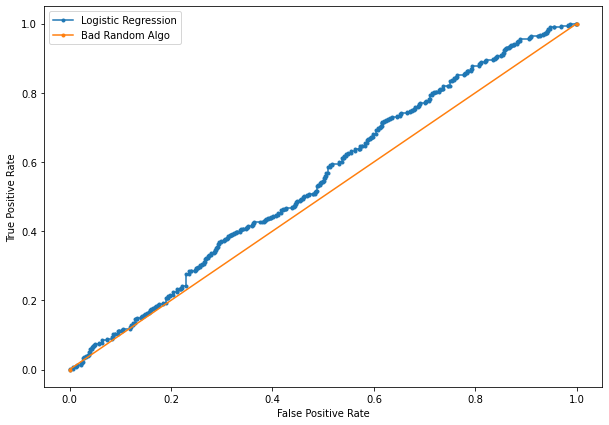

In [23]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

lr_prob = y_pred_proba_logistic[:,1]
lr_auc = roc_auc_score(y_test,lr_prob)   
lr_fpr,lr_tpr,thesholds = roc_curve(y_test,lr_prob)
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [24]:
print(f'Logistic Regression Accuracy is => {lr_auc}')


Logistic Regression Accuracy is => 0.548218644485835


### SVC

In [25]:
#### Train Data


In [26]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_train)

In [27]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_train,y_pred))
print('Precision =>',precision_score(y_train,y_pred))
print('F-1 score =>',f1_score(y_train,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_pred))
print('Recall score',recall_score(y_train,y_pred))

Accuracy => 0.5859314609636691
Precision => 0.5611510791366906
F-1 score => 0.6708990374769608
Confusion matrix =>
 [[ 636 1281]
 [ 326 1638]]
Recall score 0.8340122199592668


In [28]:
#### Test Data


In [29]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [30]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5314109165808445
Precision => 0.5049786628733998
F-1 score => 0.609442060085837
Confusion matrix =>
 [[161 348]
 [107 355]]
Recall score 0.7683982683982684


In [31]:
y_pred_proba_svc = svc.predict_proba(X_test)
y_pred_proba_svc

array([[0.44290914, 0.55709086],
       [0.42341413, 0.57658587],
       [0.52016698, 0.47983302],
       ...,
       [0.4328282 , 0.5671718 ],
       [0.43723273, 0.56276727],
       [0.60049689, 0.39950311]])

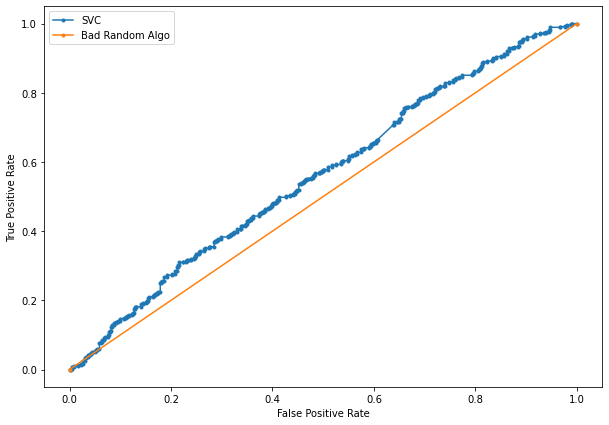

In [32]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

svc_prob = y_pred_proba_svc[:,1]
svc_auc = roc_auc_score(y_test,svc_prob)  
svc_fpr,svc_tpr,thesholds = roc_curve(y_test,svc_prob)
plt.plot(svc_fpr,svc_tpr,marker='.',label='SVC')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [33]:
print(f'SVC Accuracy is => {svc_auc}')


SVC Accuracy is => 0.5600277260395139


### KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_train)

In [35]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_train,y_pred))
print('Precision =>',precision_score(y_train,y_pred))
print('F-1 score =>',f1_score(y_train,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_pred))
print('Recall score',recall_score(y_train,y_pred))

Accuracy => 0.7116722494202525
Precision => 0.7105132037867464
F-1 score => 0.7182070007554773
Confusion matrix =>
 [[1336  581]
 [ 538 1426]]
Recall score 0.7260692464358453


In [37]:
 ### Test Data

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [39]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5283213182286303
Precision => 0.503968253968254
F-1 score => 0.525879917184265
Confusion matrix =>
 [[259 250]
 [208 254]]
Recall score 0.5497835497835498


In [40]:
y_pred_proba_knn = knn.predict_proba(X_test)
y_pred_proba_knn

array([[0.4, 0.6],
       [0. , 1. ],
       [0.4, 0.6],
       ...,
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4]])

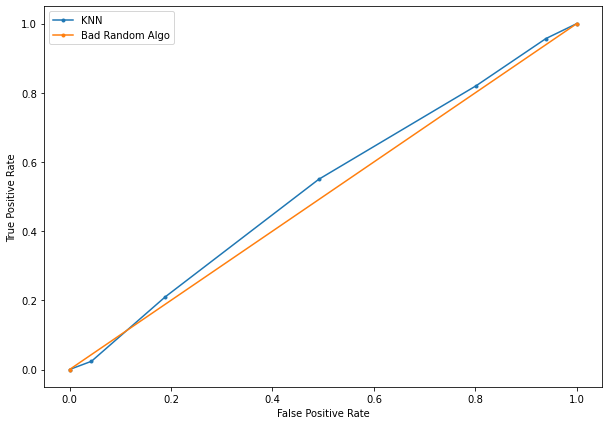

In [41]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

knn_prob = y_pred_proba_knn[:,1]
knn_auc = roc_auc_score(y_test,knn_prob)  
knn_fpr,knn_tpr,thesholds = roc_curve(y_test,knn_prob)
plt.plot(knn_fpr,knn_tpr,marker='.',label='KNN')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [42]:
print(f'KNN Accuracy is => {knn_auc}')


KNN Accuracy is => 0.5268712950441831


### Decision Tree


In [43]:
from sklearn.tree import DecisionTreeClassifier
dtrc = DecisionTreeClassifier()
dtrc.fit(X_train,y_train)
y_pred = dtrc.predict(X_train)

In [44]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_train,y_pred))
print('Precision =>',precision_score(y_train,y_pred))
print('F-1 score =>',f1_score(y_train,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_pred))
print('Recall score',recall_score(y_train,y_pred))

Accuracy => 0.999742334449884
Precision => 1.0
F-1 score => 0.9997453526865292
Confusion matrix =>
 [[1917    0]
 [   1 1963]]
Recall score 0.9994908350305499


In [45]:
### Test Data

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtrc = DecisionTreeClassifier()
dtrc.fit(X_train,y_train)
y_pred = dtrc.predict(X_test)

In [47]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.548918640576725
Precision => 0.525974025974026
F-1 score => 0.525974025974026
Confusion matrix =>
 [[290 219]
 [219 243]]
Recall score 0.525974025974026


In [48]:
y_pred_proba_dtree = dtrc.predict_proba(X_test)
y_pred_proba_dtree

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

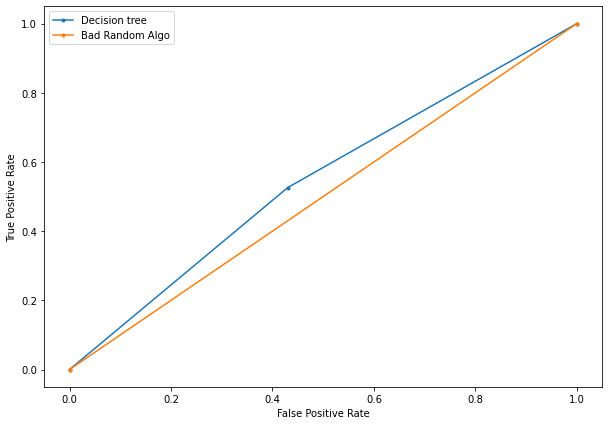

In [49]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

dtree_prob = y_pred_proba_dtree[:,1]
dtree_auc = roc_auc_score(y_test,dtree_prob)   
dtree_fpr,dtree_tpr,thesholds = roc_curve(y_test,dtree_prob)
plt.plot(dtree_fpr,dtree_tpr,marker='.',label='Decision tree')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [51]:
print(f'Decision Tree Accuracy is => {dtree_auc}')


Decision Tree Accuracy is => 0.5478593116117674


### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_train)

In [53]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_train,y_pred))
print('Precision =>',precision_score(y_train,y_pred))
print('F-1 score =>',f1_score(y_train,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_pred))
print('Recall score',recall_score(y_train,y_pred))

Accuracy => 0.999742334449884
Precision => 1.0
F-1 score => 0.9997453526865292
Confusion matrix =>
 [[1917    0]
 [   1 1963]]
Recall score 0.9994908350305499


In [54]:
#### Test Data

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [56]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5303810504634398
Precision => 0.5060728744939271
F-1 score => 0.5230125523012553
Confusion matrix =>
 [[265 244]
 [212 250]]
Recall score 0.5411255411255411


In [57]:
y_pred_proba_rfc = rfc.predict_proba(X_test)
y_pred_proba_rfc

array([[0.34, 0.66],
       [0.04, 0.96],
       [0.3 , 0.7 ],
       ...,
       [0.64, 0.36],
       [0.59, 0.41],
       [0.2 , 0.8 ]])

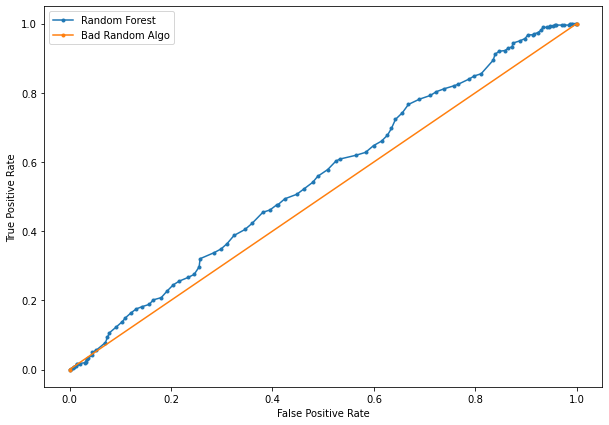

In [58]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

rfc_prob = y_pred_proba_rfc[:,1]
rfc_auc = roc_auc_score(y_test,rfc_prob)   
rfc_fpr,rfc_tpr,thesholds = roc_curve(y_test,rfc_prob)
plt.plot(rfc_fpr,rfc_tpr,marker='.',label='Random Forest')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [59]:
print(f'Random Forest Accuracy is => {rfc_auc}')

Random Forest Accuracy is => 0.551641874824586


### Gradient Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_train)

In [62]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_train,y_pred))
print('Precision =>',precision_score(y_train,y_pred))
print('F-1 score =>',f1_score(y_train,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_pred))
print('Recall score',recall_score(y_train,y_pred))

Accuracy => 0.6603968049471786
Precision => 0.6351464435146443
F-1 score => 0.6972898484152502
Confusion matrix =>
 [[1045  872]
 [ 446 1518]]
Recall score 0.7729124236252546


In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)

In [64]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5478887744593203
Precision => 0.5204262877442274
F-1 score => 0.5717073170731708
Confusion matrix =>
 [[239 270]
 [169 293]]
Recall score 0.6341991341991342


In [65]:
y_pred_proba_gbc = gbc.predict_proba(X_test)
y_pred_proba_gbc

array([[0.57233123, 0.42766877],
       [0.31010421, 0.68989579],
       [0.33103742, 0.66896258],
       ...,
       [0.52366375, 0.47633625],
       [0.4951024 , 0.5048976 ],
       [0.6529841 , 0.3470159 ]])

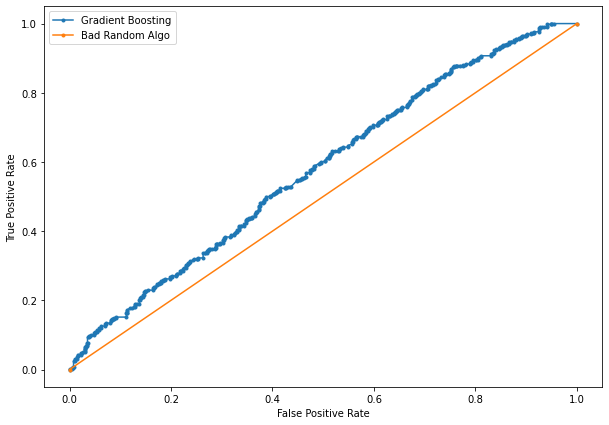

In [67]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

gbc_prob = y_pred_proba_gbc[:,1]
gbc_auc = roc_auc_score(y_test,gbc_prob)  
gbc_fpr,gbc_tpr,thesholds = roc_curve(y_test,gbc_prob)
plt.plot(gbc_fpr,gbc_tpr,marker='.',label='Gradient Boosting')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [68]:
print(f'Gradient Boosting Accuracy is => {gbc_auc}')


Gradient Boosting Accuracy is => 0.5793806717185892


### Ada Boost

In [69]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred = abc.predict(X_train)

In [70]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
print('Accuracy =>',accuracy_score(y_train,y_pred))
print('Precision =>',precision_score(y_train,y_pred))
print('F-1 score =>',f1_score(y_train,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_train,y_pred))
print('Recall score',recall_score(y_train,y_pred))

Accuracy => 0.6013913939706261
Precision => 0.5953360768175583
F-1 score => 0.627318718381113
Confusion matrix =>
 [[1032  885]
 [ 662 1302]]
Recall score 0.6629327902240326


In [71]:
#### Test Data

In [72]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)

In [73]:
print('Accuracy =>',accuracy_score(y_test,y_pred))
print('Precision =>',precision_score(y_test,y_pred))
print('F-1 score =>',f1_score(y_test,y_pred))
print('Confusion matrix =>\n',confusion_matrix(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))

Accuracy => 0.5262615859938208
Precision => 0.5019607843137255
F-1 score => 0.5267489711934157
Confusion matrix =>
 [[255 254]
 [206 256]]
Recall score 0.5541125541125541


In [74]:
y_pred_proba_abc = abc.predict_proba(X_test)
y_pred_proba_abc

array([[0.50059596, 0.49940404],
       [0.49620556, 0.50379444],
       [0.49629057, 0.50370943],
       ...,
       [0.49973633, 0.50026367],
       [0.50062333, 0.49937667],
       [0.50172616, 0.49827384]])

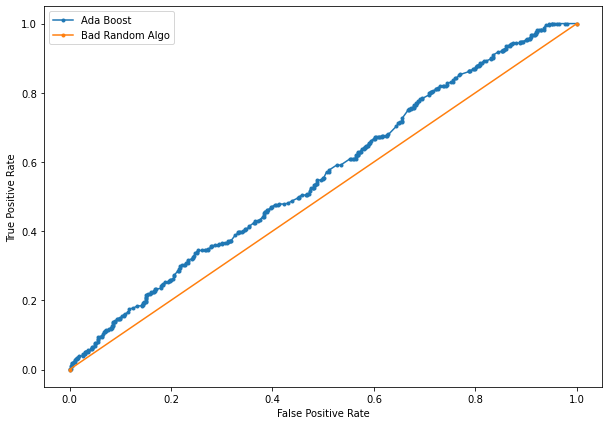

In [76]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,7))

ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds = roc_curve(y_test,ns_prob)

abc_prob = y_pred_proba_abc[:,1]
abc_auc = roc_auc_score(y_test,abc_prob)   
abc_fpr,abc_tpr,thesholds = roc_curve(y_test,abc_prob)
plt.plot(abc_fpr,abc_tpr,marker='.',label='Ada Boost')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [77]:
print(f'Ada Boost Accuracy is => {abc_auc}')


Ada Boost Accuracy is => 0.5586669388241098


### Gradient Boosting works best after feature selection 